# Data preprocessing

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Additionnal functions

def display_coef(coef_list : list((str,int))):
    print("\n \t\t\t ----- \033[1mFEATURES NAMES(WEIGHT)\033[0m ----- \n")
    for element in coef_list:
        feature,coef = element
        print("\033[1m{}\033[0m({})".format(feature,coef))



## 1. Data Exploration

In [3]:
initial_data = pd.read_csv("../Data/billets.csv", sep=";")

In [4]:
initial_data.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [5]:
initial_data["is_genuine"].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

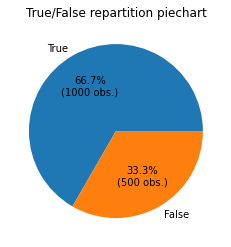

In [6]:
# True and False classes repartition

def func(pct):
    absolute = int(np.round(pct/100. * 1500))
    return "{:.1f}%\n({:d} obs.)".format(pct, absolute)

plt.pie(initial_data["is_genuine"].value_counts(normalize=True), labels=["True","False"], autopct=lambda pct : func(pct))
plt.title("True/False repartition piechart")
plt.show()

In [7]:
initial_data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

## 2. Outlier's detection and correction

In [8]:
features = initial_data.columns[1:].values

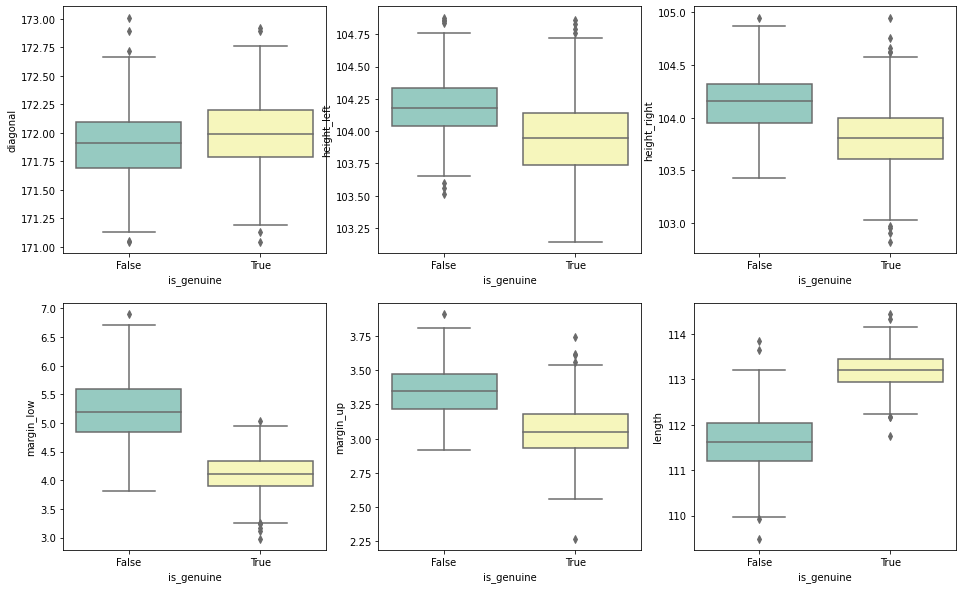

In [9]:
fig, ax = plt.subplots(2,3, figsize=(16,10))
box_indice = [(i,j) for i in range(0,2) for j in range(0,3)]
compteur = 0
for feature in features :
        row,column = box_indice[compteur]
        sns.boxplot(x="is_genuine", y=feature,
                     data=initial_data, palette="Set3", ax=ax[row,column])
        compteur+=1

**Note** : 
* La différence entre **un vrai** et **un faux** billet est marquée par **la marge inférieure/supérieure** et **la longueur horizontale** du billet  
* Très peu d'outliers éloignés des extrémités de l'ensemble de définition de nos variables  

**Action** : 
* Il est utile de garder les outliers des faux billets caractéristiques **d'une proportion non conforme**
* Nous supprimerons les outliers de la classe positive (billets authentiques) afin d'améliorer **la qualité des données** pour cette classe et ainsi améliorer **la prédiction finale** de notre modèle

In [10]:
# Data with no margin_low Nan values description
initial_data.loc[~initial_data["margin_low"].isna(), :].describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757
std,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222
min,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000
25%,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


In [11]:
# Margin low missing values observation's display
initial_data_copy = initial_data.copy()
initial_data_copy.drop(columns=["is_genuine"], inplace=True)
initial_data_copy["margin_low"] = initial_data_copy["margin_low"].fillna(0.000001)
initial_data_copy[initial_data_copy["margin_low"] == 0.000001].describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,37.000000,37.000000,37.000000,3.700000e+01,37.000000,37.000000
mean,171.928649,103.958378,103.874054,1.000000e-06,3.087838,112.826486
std,0.297145,0.288680,0.380631,2.146792e-22,0.239782,0.851388
min,171.370000,103.260000,102.820000,1.000000e-06,2.560000,110.310000
25%,171.800000,103.720000,103.620000,1.000000e-06,2.990000,112.410000
50%,171.930000,103.950000,103.860000,1.000000e-06,3.070000,112.950000
75%,172.070000,104.150000,104.120000,1.000000e-06,3.230000,113.350000
max,172.660000,104.490000,104.660000,1.000000e-06,3.620000,114.440000


In [12]:
from scipy import stats

In [13]:
# All values must be under z_score = 3 (0.5% of outliers called)
outliers_filter = (stats.zscore(initial_data[~initial_data["margin_low"].isna()][features]) < 3).all(axis=1) 

# number of outliers

outliers_nb = len(outliers_filter) - outliers_filter.sum()
print("Outliers detected : {}".format(outliers_nb))

# outliers removing

outliersless = initial_data.loc[~initial_data["margin_low"].isna()].loc[outliers_filter,:]

Outliers detected : 16


In [14]:
# Data set with both missing value and outliers free
outliersless

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
5,True,172.17,103.74,104.08,4.42,2.95,112.81
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [15]:
# check Outliers 
outliers = initial_data.loc[~initial_data["margin_low"].isna()].loc[~outliers_filter,:]

In [16]:
outliers

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
828,True,172.92,103.55,103.94,4.78,3.27,113.55
842,True,172.89,103.77,104.24,4.12,3.01,113.72
1022,False,172.89,104.03,104.03,6.03,3.00,110.95
1027,False,171.63,104.02,104.66,6.70,3.28,111.28
1029,False,171.96,104.29,104.03,6.01,3.91,110.83
1041,False,171.77,104.12,104.42,6.65,3.63,111.53
1110,False,171.73,104.32,104.07,6.56,3.30,112.80
1124,False,171.88,103.92,104.27,6.70,3.11,110.93
1169,False,171.99,104.14,104.15,6.48,3.42,112.16


## 3. Features engineering

### 3.1 Multiple Linear Regression with outliers (True and False classes mixed)

In [17]:
# Faire des tests pour valider les contraintes d'utilisation d'une RLM

In [18]:
# Replace missing values with multiple linear regression results

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# parameters dict

parameters_ = {"test_size": 0.3,
              "data_set_size": 1500}

features = initial_data.columns[1:]
data_set = initial_data.loc[(~initial_data["margin_low"].isna()),
                            features][:parameters_["data_set_size"]]

# Get number of true observations 

nb_true_obs_ = len(initial_data)
nb_true_obs = data_set.shape[0]
nb_features = data_set.shape[1] - 1

print("\n \t\t\t ----- \033[1mDATA CARACTERISTICS\033[0m ----- \n")
print("\033[1mData set dimensions  :\033[0m {} \033[1mexamples\033[0m with {} \033[1mfeatures\033[0m".format(nb_true_obs,nb_features))
print("\033[1mMissing values rate :\033[0m {}".format(1 - (nb_true_obs / nb_true_obs_)))

# setting X and Y vectors
features = list(features)
x_features = [feature for feature in features if feature!="margin_low"]
y_features = ["margin_low"]

X = data_set[x_features]
y = data_set[y_features]

# Splitting between train and test set

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=parameters_["test_size"], random_state=100)

# Fitting mlr with train set

mlr = LinearRegression()
mlr.fit(x_train, y_train)

# Parameters vectors

print("\n \t\t\t ----- \033[1mINTERCEPT VALUE\033[0m ----- \n")
print("Intercept :{}".format(*mlr.intercept_))

coef_list = list(zip(X,mlr.coef_.flatten()))
display_coef(coef_list)

# Prediction on test set

y_pred = mlr.predict(x_test)
y_test["y_pred"] = y_pred
print("\n {}".format(y_test))
# mlr evaluation

R_square = mlr.score(X,y)

meanAbErr = metrics.mean_absolute_error(y_test["margin_low"], y_pred)
meanSqErr = metrics.mean_squared_error(y_test["margin_low"], y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test["margin_low"], y_pred))



print("\t\t\t ----- \033[1mMETRICS SCORE\033[0m -----")
print("\n")
print('\033[1mR squared:\033[0m {:.2f}'.format(mlr.score(X,y)*100))
print('\033[1mMean Absolute Error:\033[0m', meanAbErr)
print('\033[1mMean Square Error:\033[0m', meanSqErr)
print('\033[1mRoot Mean Square Error:\033[0m', rootMeanSqErr)


 			 ----- DATA CARACTERISTICS ----- 

Data set dimensions  : 1463 examples with 5 features
Missing values rate : 0.024666666666666615

 			 ----- INTERCEPT VALUE ----- 

Intercept :28.136080581718474

 			 ----- FEATURES NAMES(WEIGHT) ----- 

diagonal(-0.10186272346539829)
height_left(0.15916305172793174)
height_right(0.2377876907773883)
margin_up(0.23173527005070974)
length(-0.427122489800819)

       margin_low    y_pred
1476        5.13  5.228728
57          4.01  4.135039
411         3.74  4.085668
961         4.10  4.466255
650         3.78  4.250721
...          ...       ...
524         4.58  4.345420
1437        5.67  4.745447
407         4.45  3.987420
1387        5.39  5.104386
272         4.25  4.327206

[439 rows x 2 columns]
			 ----- METRICS SCORE -----


R squared: 47.68
Mean Absolute Error: 0.36674588801493613
Mean Square Error: 0.22806347286184822
Root Mean Square Error: 0.47755991546804705


### 3.2 Multiple Linear Regression outliers free (True and False classes mixed)

In [19]:
# Replace missing values with multiple linear regression results

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# parameters dict

parameters_ = {"test_size": 0.3,
              "data_set_size": 1500}

features = outliersless.columns[1:]
data_set = outliersless.loc[(~outliersless["margin_low"].isna()),
                            features][:parameters_["data_set_size"]]

# Get data caracteristics

nb_true_obs_ = len(initial_data)
nb_true_obs = data_set.shape[0]
nb_features = data_set.shape[1] - 1

print("\n \t\t\t ----- \033[1mDATA CARACTERISTICS\033[0m ----- \n")
print("\033[1mData set dimensions  :\033[0m {} \033[1mexamples\033[0m with {} \033[1mfeatures\033[0m".format(nb_true_obs,nb_features))
print("\033[1mMissing values rate :\033[0m {}".format(1 - (nb_true_obs / nb_true_obs_)))

# setting X and Y vectors
features = list(features)
x_features = [feature for feature in features if feature!="margin_low"]
y_features = ["margin_low"]

X = data_set[x_features]
y = data_set[y_features]

# Splitting between train and test set

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=parameters_["test_size"], random_state=100)

# Fitting mlr with train set

mlr = LinearRegression()
mlr.fit(x_train, y_train)

# Parameters vectors

print("\n \t\t\t ----- \033[1mINTERCEPT VALUE\033[0m ----- \n")
print("Intercept :{}".format(*mlr.intercept_))

coef_list = list(zip(X,mlr.coef_.flatten()))
display_coef(coef_list)

# Prediction on test set

y_pred = mlr.predict(x_test)
y_test["y_pred"] = y_pred
print("\n {}".format(y_test))
# mlr evaluation

R_square = mlr.score(X,y)

meanAbErr = metrics.mean_absolute_error(y_test["margin_low"], y_pred)
meanSqErr = metrics.mean_squared_error(y_test["margin_low"], y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test["margin_low"], y_pred))



print("\t\t\t ----- \033[1mMETRICS SCORE\033[0m -----")
print("\n")
print('\033[1mR squared:\033[0m {:.2f}'.format(mlr.score(X,y)*100))
print('\033[1mMean Absolute Error:\033[0m', meanAbErr)
print('\033[1mMean Square Error:\033[0m', meanSqErr)
print('\033[1mRoot Mean Square Error:\033[0m', rootMeanSqErr)


 			 ----- DATA CARACTERISTICS ----- 

Data set dimensions  : 1447 examples with 5 features
Missing values rate : 0.03533333333333333

 			 ----- INTERCEPT VALUE ----- 

Intercept :22.8915116099323

 			 ----- FEATURES NAMES(WEIGHT) ----- 

diagonal(-0.103372893429269)
height_left(0.1756663124320033)
height_right(0.24752720463880798)
margin_up(0.2513212254055196)
length(-0.4032310759195663)

       margin_low    y_pred
950         3.74  4.069641
307         4.30  4.275021
575         3.64  4.072003
391         4.08  4.349439
1386        5.87  5.157486
...          ...       ...
1213        5.22  4.988809
812         3.53  3.921132
1393        4.93  5.098968
1102        4.96  4.878007
149         4.66  3.805554

[435 rows x 2 columns]
			 ----- METRICS SCORE -----


R squared: 47.70
Mean Absolute Error: 0.338383583527164
Mean Square Error: 0.18843449815366403
Root Mean Square Error: 0.4340904262405058


## 4. Data imputation

In [20]:
# fill missing values with mlr margin low predictions

x_data = initial_data.loc[initial_data["margin_low"].isna(), x_features]
margin_low_predict = mlr.predict(x_data)

indexs = list(initial_data.loc[initial_data["margin_low"].isna(),:].index)
for index, value in zip(indexs, margin_low_predict):
    initial_data.loc[index,"margin_low"] = value

In [21]:
initial_data.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

## 5. Outliers detection after data imputation

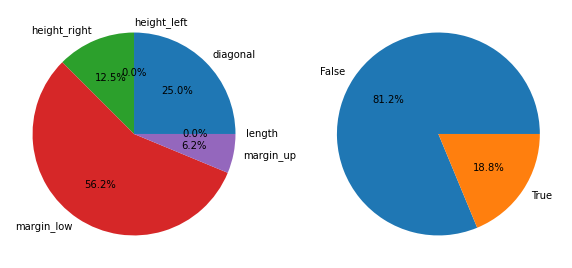

In [22]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
# Outliers counts per feature
x = (stats.zscore(initial_data.drop(columns=["is_genuine"])) > 3).sum()
outliers_filter = (stats.zscore(initial_data.drop(columns=["is_genuine"])) < 3).all(axis=1)
x_classes = initial_data.loc[~outliers_filter, "is_genuine"].value_counts()
ax[0].pie(x, labels = x.index, autopct="%1.1f%%",radius=1)
ax[1].pie(x_classes, labels = x_classes.index, autopct="%1.1f%%")
plt.show()

In [23]:
initial_data.loc[~outliers_filter, "is_genuine"].value_counts()

False    13
True      3
Name: is_genuine, dtype: int64

In [24]:
outliers_filter = (stats.zscore(initial_data.drop(columns=["is_genuine"])) < 3).all(axis=1)

In [25]:
initial_data.loc[~outliers_filter,:]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
828,True,172.92,103.55,103.94,4.78,3.27,113.55
842,True,172.89,103.77,104.24,4.12,3.01,113.72
1022,False,172.89,104.03,104.03,6.03,3.00,110.95
1027,False,171.63,104.02,104.66,6.70,3.28,111.28
1029,False,171.96,104.29,104.03,6.01,3.91,110.83
1041,False,171.77,104.12,104.42,6.65,3.63,111.53
1110,False,171.73,104.32,104.07,6.56,3.30,112.80
1124,False,171.88,103.92,104.27,6.70,3.11,110.93
1169,False,171.99,104.14,104.15,6.48,3.42,112.16


**Note**: 
* L'imputation n'a pas ajouté d'outliers au jeu de données principal  
* Les outliers concernent en majorité les faux billets

In [26]:
# Outliers removing
param_ = 0

if param_ != 0 :
    outliers_index = initial_data.loc[~outliers_filter,:].index
    initial_data.drop(index=outliers_index, inplace=True)

In [28]:
initial_data.to_csv("../Data_set/imputed_data.csv", index=0)